## GRIP : The Sparks foundation Data Science and Business Analytics internship
## Creator : Munj Bhavesh Patel
## Task 1: Prediction using supervised ML

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting Parameters

plt.rcParams['figure.figsize'] = 10,10

## Importing the data and getting basic info about it:

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Scaling the Scores variable:

In [9]:
df['Scores'] = df['Scores']/10
df

,Hours,Scores
0,2.5,2.1
1,5.1,4.7
2,3.2,2.7
3,8.5,7.5
4,3.5,3.0
5,1.5,2.0
6,9.2,8.8
7,5.5,6.0
8,8.3,8.1
9,2.7,2.5


## Checking the skewness, kurtosis and distribution of Hours and Scores variables:

C:\Users\Munj Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Skewness of Hours variable is 0.1787220638918746.
Kurtosis of Hours varibale is -1.2868356406445227.

Skewness of Scores variable is 0.21968605283072454.
Kurtosis of Scores varibale is -1.4015694043236628.


C:\Users\Munj Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


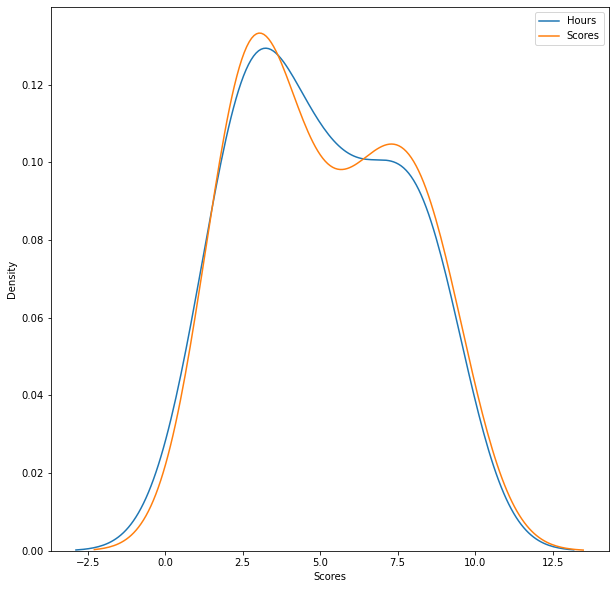

In [10]:
from scipy.stats import skew, norm, kurtosis

sns.distplot(df['Hours'],hist=False, label = 'Hours')
plt.legend()
print(f'Skewness of Hours variable is {skew(df.Hours)}.')
print(f'Kurtosis of Hours varibale is {kurtosis(df.Hours)}.\n')

sns.distplot(df['Scores'],hist=False, label = 'Scores')
plt.legend()
print(f'Skewness of Scores variable is {skew(df.Scores)}.')
print(f'Kurtosis of Scores varibale is {kurtosis(df.Scores)}.')

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,5.148000
std,2.525094,2.528689
min,1.100000,1.700000
25%,2.700000,3.000000
50%,4.800000,4.700000
75%,7.400000,7.500000
max,9.200000,9.500000


## Checking for correlation:

<AxesSubplot:>

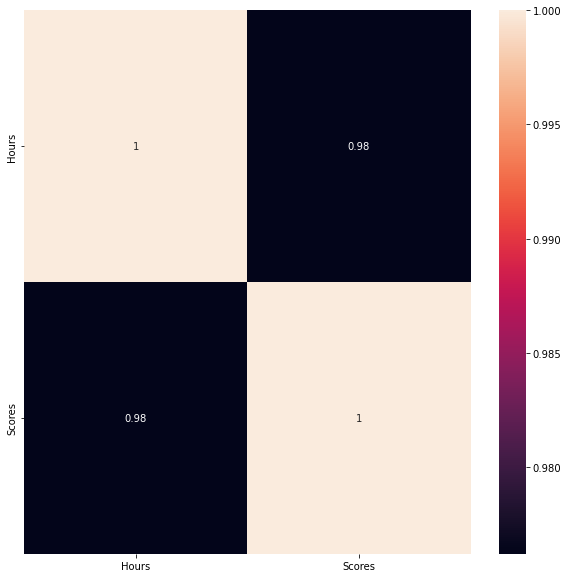

In [12]:
sns.heatmap(df.corr(), annot=True)

## Defining the dependent and independent variables:

In [13]:
x = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [16]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

## Defining, training and testing the model:

In [17]:
model = LinearRegression()

In [18]:
y_train.shape

(18, 1)

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)
y_pred

array([[2.84772374],
       [3.93168547],
       [3.43897559],
       [6.00106694],
       [1.66522004],
       [7.47919656],
       [6.98648669]])

## Checking the evaluation metrics:

In [21]:
print(f'r2_score of the model: {r2_score(y_test, y_pred)}.')
print(f'mse of the model: {mean_squared_error(y_test, y_pred)}.')
print(f'rmse of the model: {np.power(mean_squared_error(y_test, y_pred), 1/2)}.')
print(f'mae of the model: {mean_absolute_error(y_test, y_pred)}.')

r2_score of the model: 0.9403157736545141.
mse of the model: 0.24999164520709236.
rmse of the model: 0.4999916451372886.
mae of the model: 0.46669378698224856.


## Predicting the score for the new input:

In [22]:
model.coef_

array([[0.98541975]])

In [23]:
model.intercept_

array([0.18709042])

In [24]:
Y = model.intercept_ + (model.coef_)*x

### So at x = 9.25:

In [25]:
y_new = model.intercept_ + (model.coef_)*9.25
y_new

array([[9.3022231]])

In [26]:
y_new*10

array([[93.02223095]])

### Hence a student who studies for 9.25 hours a day will have a score of 9.302 (factored by 10), that is about 93%.